# Métodos III - Derivadas 


## Derivada direccional y funciones diferenciables


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Enero 2019


In [265]:
import time
print(' Last version ', time.asctime() )

 Last version  Tue Feb  5 19:46:48 2019


### Objectivos

Recordar que la derivada está relacionada con la pendiente de la función.

Presentar los conceptos de

* derivada direccional de una función escalar

* funciones diferenciables

Remarcar que en funciones escalares y vectorales para dar la derivada necesitamos

* el punto y una dirección de desplacamiento en el espacio inicial

Estudiar la derivada direccional en un plano.

Recordaremos que son las funciones "suaves" y la relación del desarrollo de Taylor


In [266]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

### Derivada direccional

En funciones de una dimensión, $f(x)$, la derivada estaba asociada la la "pendiente" de la función en un punto. 

Su definición era:

$$
f'(x) = \lim_{h \to 0} \frac{f(x +h) - f(x)}{h}
$$



Observa la siguiente gráfica de la función escalar $f(x, y) = y - x$. Se trata de un plano
con pendiente en $x$ -1 y con pendiente en $y$ +1 que pasa por el origen. 

Puedes ver que si queremos dar la pendiente en un determinado punto $(x_0, y_0)$ tenemos que indicar también en qué dirección queremos calcular esa pendiente $(v_x, v_y)$.



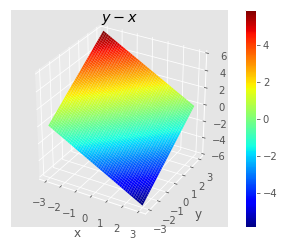

In [267]:
xs = np.linspace(-3., 3., 50)
ys = np.linspace(-3., 3., 50)
xms, yms = np.meshgrid(xs, ys)
a, b, c = -1., +1., 0. 
zms = a*xms +b*yms +c
fig = plt.figure(); ax = plt.gca(projection = '3d')
sf = ax.plot_surface(xms, yms, zms, cmap='jet');
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_title('$y - x$');
fig.colorbar(sf); ax.set_aspect('equal')

Sitúate por ejemplo en el origen $(0, 0)$ y ahora a partir de los conjuntos de nivel, intenta determinar cuál es la pendiente si nos deplazamos en estas direcciones:

i) en $x$, esto es en ${\bf v} = (1, 0)$

ii) en $y$, en ${\bf v} = (0, 1)$

iii) en la bisectriz del primer cuadrante ${\bf v} = (1, 1)$



In [268]:
def contour_with_derdir(xms, yms, zms, x0, y0, vx, vy):
    fig = plt.figure(); ax = plt.gca()
    c1 = ax.contour(xms, yms, zms, 12, alpha=0.8, cmap='jet')
    ax.plot(x0, y0, color='black', marker='*', markersize=10)
    head = 0.3
    vx, vy = 0.7*vx, 0.7*vy
    ax.arrow(x0, y0, vx, vy, head_width=head, head_length=head, fc='k', 
             color='black', lw=1)
    c1.clabel(fontsize=10, inline=1)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_aspect('equal')
    fig.colorbar(c1, ax=ax);
    return 

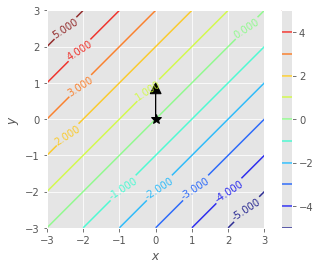

In [269]:
x0, y0 = 0., 0.  # point
vx, vy = 0., 1.  # direction
xs = np.linspace(-3., 3., 50)
ys = np.linspace(-3., 3., 50)
xms, yms = np.meshgrid(xs, ys)
a, b, c = -1., +1., 0. 
zms = a*xms+b*yms+c
ct = contour_with_derdir(xms, yms, zms, x0, y0, vx, vy)


Cuando tenemos una función escalar, $f({\bf x})$, y damos el punto ${\bf x}_0$ y una dirección ${\bf v}$, podemos, ahora sí, calcular la derivada usando las funciones de una dimensión.

Podemos construir:
$$
g(t) = f({\bf x}_0 + h {\bf v}) 
$$

que es una función de una dimensión, $g(t)$. De la que sabemos calcular su derivada en 0, la que también es la derivada de $f({\bf x})$ en el punto ${\bf x}_0$ y la dirección ${\bf v}$, $f'({\bf x}_0; {\bf v})$, que llamamos **derivada direccional**.

$$
f'({\bf x}_0; {\bf v}) = g'(0) = \lim_{h \to 0} \frac{f({\bf x}_0 + h {\bf v}) - f({\bf x}_0)}{h}
$$

Nota que en la derivada direccional, $f({\bf x}_0 ; {\bf v})$, aparece *explícitamente* la dirección en la que la calculamos ${\bf v}$.


*Ejemplo*: Vamos a calcular la derivada direccional del plano $f(x, y) = x -y$ en el origen y en las direcciones $(1, 0); \; (0, 1), \; (1, 1)$



Tenemos que calcular:

$
f'((0, 0), \; (v_x, v_y)) = \lim \frac{f(h v_x, \, h  v_y)) - \,f (0,0)}{ h}
$

con 

$
f(x, y) = y - x
$

entonces

$
f(h v_x,h  v_y)) = h v_y -  h v_x = h (v_y - v_x)
$

i) para el vector $(1, 0)$

$
f'((0, 0) ; \, (1, 0)) = \lim_{h \to 0} \frac{-h}{h} = -1
$

ii) para el vector $(0, 1)$.

$
f'((0, 0) ; \, (1, 0)) = \lim_{h \to 0} \frac{h}{h} = 1
$


iii) para el vector $(1, 1)$.

$
f'((0, 0) ; \, (1, 0)) = \lim_{h \to 0} \frac{h (1 -1)}{h} = 0
$

iv) y para un vector genérico $(v_x, v_y)$

$
f'((0, 0) ; \, (v_x, v_y)) = \lim_{h \to 0} \frac{h (v_y - v_x)}{h} = v_y - v_x
$





#### Derivadas parciales

Llamaremos derivadas parciales de una función escalar en un punto a las derivadas direccionales en los ejes coordenados. 

En el caso anterior, la derivada parcial con respecto a $x$ es:

$
f'_x (x, y) = \frac{\partial f(x, y)}{ \partial x} = f'((x, y); \, (1, 0))
$

y con respecto a $y$

$
f'_y (x, y) = \frac{\partial f(x, y)}{ \partial y} = f'((x, y); \, (1, 0))
$

Date cuenta de que usamos distintas notaciones con igual significado



Para calcular las derivadas direccionales podemos valernos de los métodos de derivación de funciones reales de una dimensión.

Si calculamos la derivida parcial respecto a $x$, consideramos la $y$ como una constante en la expresión de la función, y derivaremos normalmente respecto a $x$.

Considera la función:
$$
f(x, y) = 9 -x^2 - y^2
$$

Las derivadas parciales serán:
$$
f'_x (x, y) = -2 x, \;\, f'_y(x, y) = -2 y
$$

*Ejercicio*: puedes comprobar que obtienes la misma expresión si calcula la derivada direccional en la dirección $x$ o $y$ usando la definición anterior. 



Pero con tener derivadas parciales, no está todo.

Estudia ahora la siguiente función:

$$
f(x,y) = \left \{
\begin{array}{ l l}
x+y & \quad \mbox{si $x=0$ o $y=0$} \\
1 & \quad \mbox{en cualquier otro caso} \\
\end{array}
\right.
$$

Comprueba que en el origen tiene derivadas parciales, ¡pero no tiene derivadas en cualquier otra dirección!

Tampoco basta con que tenga derivadas direccionales en todas las direcciones.

Estudia ahora esta función, que es incluso peor:

$$
f(x,y) = \left \{
\begin{array}{ l l}
x+y & \quad \mbox{si $x=0$ o $y=0$} \\
0 & \quad \mbox{en cualquier otro caso} \\
\end{array}
\right.
$$

En el origen, es continua, tiene derivadas parciales y todas las direccionales, pero su gráfica es endemoniada, no es en absoluto "suave".


### Funciones diferenciables

En funciones reales en 1D, decíamos que una función era diferenciable si era "suave", si era continua, no tenía ni dobleces ni quiebros.

En otras palabras, era diferenciable si admitía el desarrollo de Taylor. 

En primer orden el desarrollo de Taylor de en una función real de 1D nos permitía aproximar, en un valor $x$ "próximo" a $x_0$ la función por una recta con pendiente $f'(x_0)$, la derivada. 

$$
f(x) = f(x_0) + f'(x_0) \, (x - x_0) 
$$

Recuerda que la ecuación de una recta que pasa por el punto $(x_0, y_0)$ con pendiente $a$ viene dada por:

$$
y(x) = y_0 + a \, (x-x_0)
$$

La derivada es la pendiente de la función en un punto. 

En la siguiente figura hemos dibujado la función $f(x) = x^2$ y el desarrollo de Taylor en el punto $x_0$. Puedes observar que en una pequeña región la recta y la función se superponen. Puedes explorar cambiando el valor de $x_0$.

Es claro que $f(x)$ es "suave".

In [289]:
def fun1d_der(x0):
    xs   = np.linspace(-3., 3., 100)
    ys   = xs*xs
    m    = 2*x0
    y0   = x0*x0
    yt   = m*(xs-x0) + y0
    plt.plot(xs, ys, color = 'black', lw = 2, label = '$f(x) = x^2$')
    plt.plot(xs, yt, color = 'blue' , lw = 2, label = 'Taylor ')
    plt.legend()
    plt.xlim(-3., 3.); plt.ylim(-1., 9.)
    plt.xlabel('$x$'); plt.ylabel('f(x)')
    return

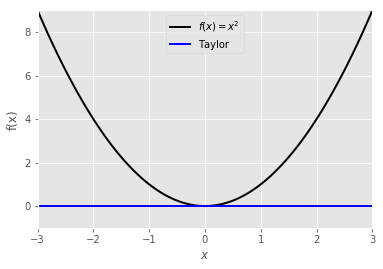

In [285]:
x0 = 0.
fun1d_der(x0);

Consideremos ahora una función escalar de dos dimensiones, diremos que es "suave", si su gráfica es continua (no está quebrada), no tiene dobleces ni picos.

Observa la gráfica de este función, ¿consideras que es "suave"? ¿está rasgada, tiene dobleces, picos?

$$
f(x, y) = 9 - x^2 - y^2
$$

Ciertamente es "suave"


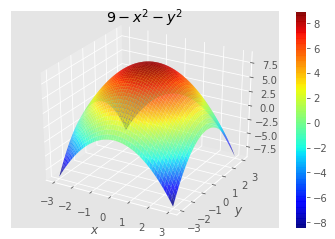

In [286]:
ys = np.linspace(-3., 3., 100)
xms, yms = np.meshgrid(xs, ys)
zms = -xms*xms - yms*yms + 9 
fig = plt.figure(); ax = plt.gca(projection='3d')
c1 = ax.plot_surface(xms, yms, zms, cmap= 'jet', alpha = 0.8)
ax.set_xlabel(r'$x$'); ax.set_ylabel(r'$y$'); ax.set_title('$9-x^2 -y^2$')
fig.colorbar(c1);

Las funciones escalares de dos dimensiones serán diferenciables si podemos hacer su desarrollo de Taylor de primer orden.

Que en este caso significa que en una región "pequeña", en un punto $(x, y)$ "próximo" al punto $(x_0, y_0)$, la gráfica de la función puede aproximarse por un plano, cuya pendiente en la dirección $x$ correspondera a su derivada parcial en $x$ en ese punto, $f'_x(x_0, y_0)$ y la pendiente en la dirección $y$, a la derivada parcial en $y$, $f'_y (x_0, y_0)$.

El desarrollo de Taylor de primer orden será:

$
f(x, y) = f(x_0, y_0) + f'_x(x_0, y_0) \,  (x-x_0) + f'_y(x_0, y_0) \,( y - y_0) 
$

Recuerda que la ecuación de un plano que pasa por $(x_0, y_0, z_0)$, con pendientes $a$ en la dirección $x$ y $b$ en la dirección $y$, viene dada por:

$
z(x, y) = z_0 + a (x - x_0) + b (y - y_0)
$

de donde identificamos rápidamente:
$
a = f'_x (x_0, y_0), \; b = f'_y (x_0, y_0)
$

que son, claro está, las derivadas parciales.


Observa la gráfica de la función

$
f(x, y) = 9 -x^2 - y^2
$

A la que hemos sobre-impuesto en un punto $(x_0, y_0)$ un plano que corresponde a su desarrollo de Taylor de primer orden.

$
f(x, y) = f(x_0, y_0) + f'_x(x_0, y_0) \,  (x-x_0) + f'_y(x_0, y_0) \,( y - y_0) 
$

Puedes cambiar el punto y ver cómo el plano cubre, solapa la gráfica en una región alrededor del $(x_0, y_0)$. similar a lo que ocurría con la recta en una función de una dimensión.




In [287]:
def fun2d_dir(x0, y0, phi = 45):
    xs = np.linspace(-3., 3., 100)
    ys = np.linspace(-3., 3., 100)
    xms, yms = np.meshgrid(xs, ys)
    zms = -xms*xms - yms*yms + 9 
    fig = plt.figure(); ax = plt.gca(projection='3d')
    c1 = ax.plot_surface(xms, yms, zms, cmap= 'jet', alpha = 0.5)
    ax.view_init(azim = phi)
    a, b = -2*x0, - 2.*y0
    L = 0.8
    xps  = np.linspace(x0-L, x0+L, 20)
    yps  = np.linspace(y0-L, y0+L, 20)
    xpms, ypms = np.meshgrid(xps, yps)
    z0   = -x0*x0 - y0*y0 +9
    zpms = a*(xpms-x0) + b * (ypms-y0) + z0
    ax.plot_surface(xpms, ypms, zpms, color = 'blue', alpha = 1.)
    ax.set_xlim(-3., 3.); ax.set_ylim(-3., 3.);
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    fig.colorbar(c1, ax=ax);
    return 

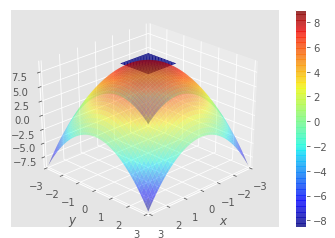

In [283]:
x0, y0 = 0, 0.
fun2d_dir(x0, y0, phi = 45.)

**¡Esto es todo por ahora!**